# pre processing the data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys, walk_through_dir

--2024-06-13 20:12:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py'

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-06-13 20:12:20 (17.7 MB/s) - 'helper_functions.py' saved [10246/10246]



2024-06-13 20:12:22.564605: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 20:12:22.564719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 20:12:22.702664: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pandas as pd

# Load CSV file into a DataFrame

df = pd.read_csv('/kaggle/input/mental-health-corpus/mental_health.csv')

# Display the DataFrame
df.head(20)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


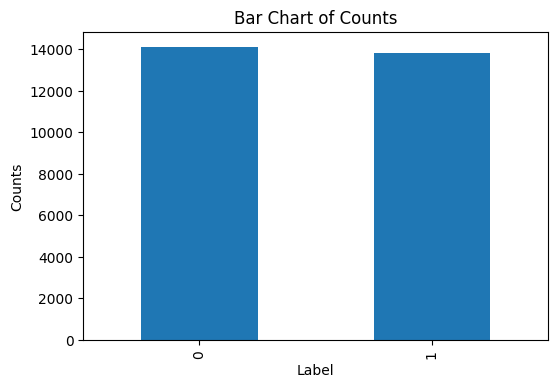

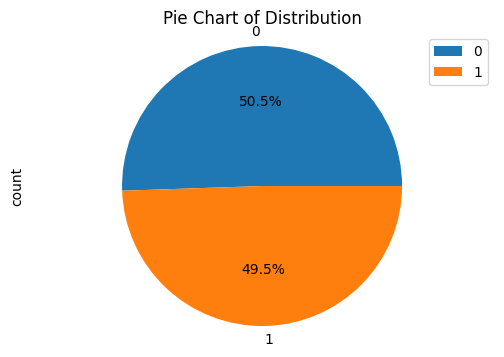

In [4]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'category' column
category_counts = df['label'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Bar Chart of Counts')
plt.show()
print()

# Pie chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Pie Chart of Distribution')

# Add legend
plt.legend()

plt.show()

In [5]:
df.shape[0]

27977

In [6]:
len(df[df.duplicated()])

5

In [7]:
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)

top_5_duplicate_pairs

,text,label
15524,happy birthday everyone birthday st october ha...,0
24502,happy birthday everyone birthday st october ha...,0
16742,need help anyone good pythagriam tribometry h...,0
24970,need help anyone good pythagriam tribometry h...,0
1646,posting ara ara forget day ara ara,0
22603,posting ara ara forget day ara ara,0
11570,real suppleroot hours up day far,0
12573,real suppleroot hours up day far,0
22389,real suppleroot hours up day far,0


In [8]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


In [9]:
df = df.dropna()
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Missing Values: 0


In [10]:
def random_sample_reviews(df, num_samples):
    # Use groupby on 'Rating' and then apply the sample function to 'Review_Text' of each group
    samples = df.groupby('label')['text'].apply(lambda x: x.sample(num_samples))

    # Convert series to dataframe and reset index
    # samples_df = samples.reset_index()
    samples_df = samples.reset_index().drop(columns='level_1')

    return samples_df
pd.set_option('display.max_colwidth', 200) # This will display up to 100 characters
samples = random_sample_reviews(df, num_samples=3)
samples.head(20)

,label,text
0,0,im fond film vexes many reviewers rank peter jackson trilogy filmed novel always interpretive particular animated film relies artists vision judged terms speaking purist finer homage tolkien updat...
1,0,broke system really wanting pushups day muster motivation solution push ups right push ups ten separate times right worked literally told youre push ups sets ten worked pushups alot stronger...
2,0,go get dsdswii older console start playing games right now seriously go play something it youll blast time probably best era nintendo games especially super mario galaxy series soundtrack gold don...
3,1,anymoreim done burden need help feel like im dying
4,1,zoloft focalin changed life past four years better week feeling like regressing lot interest activities normally like brain feels like fog around love new job energy perform well fiancee went town...
5,1,could use friendso ive feeling pretty bad past weeks think lot holidays really rough weather ive really depressed suicidal could surrounded loved ones feel alone like disappointment feel like burd...


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import string

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## removing non alpha numeric charachter

In [12]:
def strip_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [13]:
df['text1'] = (df['text']
                     .apply(strip_emoji)
                     .apply(strip_all_entities)
                     .apply(clean_hashtags)
                     .apply(filter_chars)
                     .apply(remove_mult_spaces))

## removing stopword

In [14]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [15]:
df['text2'] = (df['text1'].apply(remove_stopwords))

In [16]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the sentence
    word_list = nltk.word_tokenize(text)

    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    return lemmatized_output

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [17]:
df['text3'] = df['text2'].apply(lemmatize_text)

In [18]:
df_lemma = pd.DataFrame()

# Original text and its length
df_lemma['pre-clean text'] = df['text2']
df_lemma['pre-clean len'] = df['text2'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_lemma['post-clean text'] = df['text3']
df_lemma['post-clean len'] = df['text3'].apply(lambda x: len(str(x).split()))

df_lemma.head(20)

,pre-clean text,pre-clean len,post-clean text,post-clean len
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,23,dear american teen question dutch person heard guy get way easier thing learn age u sooooo thth grader like right guy learn math,23
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang,19,nothing look forward lifei dont many reason keep going feel like nothing keep going next day make want hang,19
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...,61,music recommendation im looking expand playlist usual genre alt pop minnesota hip hop steampunk various indie genre artist people like cavetown aliceband bug hunter penelope scott various rhymesay...,61
3,im done trying feel betterthe reason im still alive know mum devastated ever killed ever passes im still state im going hesitate ending life shortly im almost take meds go therapy nothing seems he...,96,im done trying feel betterthe reason im still alive know mum devastated ever killed ever pass im still state im going hesitate ending life shortly im almost take med go therapy nothing seems help ...,97
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electroni...,296,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl year life uk live different country kept touch electronic ...,296
5,hey rredflag sure right place post goes im currently student intern sandia national labs working survey help improve marketing outreach efforts many schools recruit around country looking current ...,57,hey rredflag sure right place post go im currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country looking current under...,57
6,feel like someone needs hear tonight feeling right think cant anything people keep puting listen life everyone else living someone tells unable something work get done say wrong someone says youl ...,69,feel like someone need hear tonight feeling right think cant anything people keep puting listen life everyone else living someone tell unable something work get done say wrong someone say youl nev...,69
7,deserve liveif died right noone carei real friendsi always start conversations get dry responses feel comfortable around females emotional abuse mom put left usi never find love keep getting remin...,47,deserve liveif died right noone carei real friendsi always start conversation get dry response feel comfortable around female emotional abuse mom put left usi never find love keep getting reminded...,47
8,feels good ive set dateim killing friday nice finally know im gonna bye,13,feel good ive set dateim killing friday nice finally know im gon na bye,14
9,live guiltok made stupid random choice getting basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoy...,62,live guiltok made stupid random choice getting basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoy...,62


In [19]:
df['text_length'] = df['text3'].apply(lambda x: len(str(x).split()))

In [20]:
import numpy as np

In [21]:
text_lengths = [len(text.split()) for text in df["text3"]]

# Find the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)

print(f"95th Quartile of Text Lengths: {quartile_95}")

95th Quartile of Text Lengths: 231.0


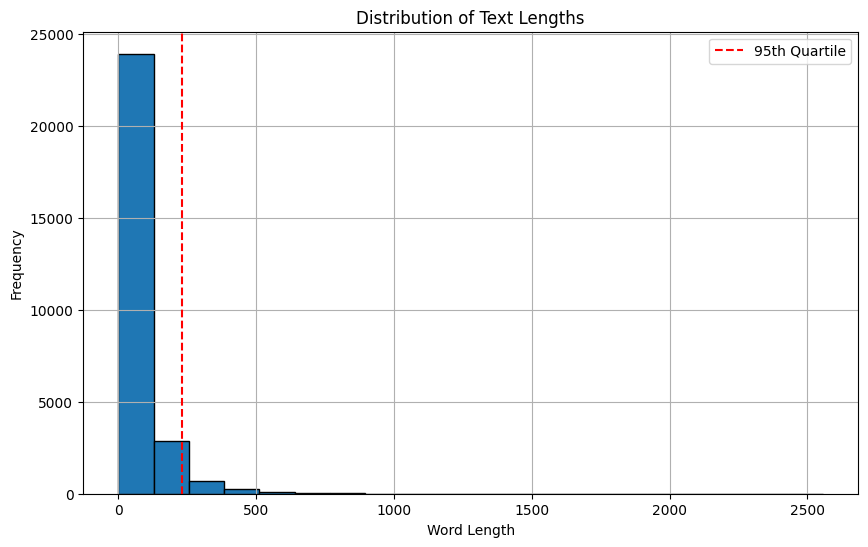

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Adding a vertical line for the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)
plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.grid(True)
plt.show()

In [23]:
df.text_length.describe()

count    27972.000000
mean        68.121014
std         97.784015
min          0.000000
25%         15.000000
50%         36.000000
75%         82.000000
max       2556.000000
Name: text_length, dtype: float64

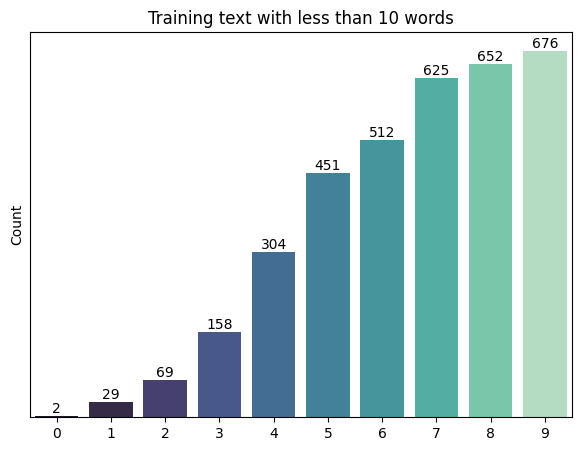

In [24]:
import seaborn as sns

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_length', data=df[df['text_length']<10], palette='mako')
plt.title('Training text with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [25]:
data_head=df[df['text_length']<2]
data_head.head(30)

,text,label,text1,text2,text3,text_length
654,sleep,0,sleep,sleep,sleep,1
1811,karent,0,karent,karent,karent,1
2781,male,0,male,male,male,1
3354,cthgisnialpnidenodnabamocefilretfalarutcetihcrasptth,1,cthgisnialpnidenodnabamocefilretfalarutcetihcrasptth,cthgisnialpnidenodnabamocefilretfalarutcetihcrasptth,cthgisnialpnidenodnabamocefilretfalarutcetihcrasptth,1
3626,enoughhttpimgurcomhqermql,1,enoughhttpimgurcomhqermql,enoughhttpimgurcomhqermql,enoughhttpimgurcomhqermql,1
4094,whiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelya...,1,whiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelya...,whiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelya...,whiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelya...,1
4578,name,1,name,name,name,1
4743,hello,1,hello,hello,hello,1
4837,something,0,something,something,something,1
6579,,0,,,,0


In [26]:
df = df[df['text_length'] >= 3]

In [27]:
len(df)

27872

In [28]:
df = df.drop(['text', 'text1', 'text2'], axis=1)

In [29]:
df = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df.head(30)

,label,text3,text_length
10110,0,video picture death video photo always death youll eventually die youll already taken video solved clickbait video video taken death thank later,22
16118,0,help help commenting post want orange mail pls,8
4336,1,anyone talk toi need someone talk situation,7
7496,1,tonightno shitty life bad circumstance no im lazy incompetent unsuccessful nothing happened beyond normal im done living want anymore ive downward spiral since im now shit together im well way ish...,147
7954,1,anyone feel like life force throati feel like everything life force upon im forced act way way im forced go school im forced work job passion im forced smile im forced cry im forced get married ki...,84
25377,0,anyone else absolutely hate situation mean getting scolded parent remaining calm trying explain everything time finally getting annoyed situation exact second turn theyre calm nowhere trying act l...,40
17739,0,anyone want silver idk whoever comment first ig,8
1762,1,destined failure tragedy mom dy im year old im beside dy pneumonia breast cancer chemo fail law school year debt age got pregnant gave birth month daughter dy hour alive cousin age gave birth heal...,132
21839,0,karma hit today cake make,5
26355,1,last year sold beautiful condominium foolish use mind time cat got sick one passed away one week later due move new vet killed got sick needed help given taken mental hospital police vet told poli...,69


In [30]:
df.label.value_counts()

label
0    14074
1    13798
Name: count, dtype: int64

In [31]:
data = {
    'Label': ["Non-mental-health", "Mental-health"],
    'Label Encoded': [0,1]
}

# Create DataFrame
dr = pd.DataFrame(data)

# Print DataFrame
dr

,Label,Label Encoded
0,Non-mental-health,0
1,Mental-health,1


In [32]:
dataset = df
dataset['text'] = df['text3']
dataset['label'] = df['label']

In [33]:
dataset.head()

,label,text3,text_length,text
10110,0,video picture death video photo always death youll eventually die youll already taken video solved clickbait video video taken death thank later,22,video picture death video photo always death youll eventually die youll already taken video solved clickbait video video taken death thank later
16118,0,help help commenting post want orange mail pls,8,help help commenting post want orange mail pls
4336,1,anyone talk toi need someone talk situation,7,anyone talk toi need someone talk situation
7496,1,tonightno shitty life bad circumstance no im lazy incompetent unsuccessful nothing happened beyond normal im done living want anymore ive downward spiral since im now shit together im well way ish...,147,tonightno shitty life bad circumstance no im lazy incompetent unsuccessful nothing happened beyond normal im done living want anymore ive downward spiral since im now shit together im well way ish...
7954,1,anyone feel like life force throati feel like everything life force upon im forced act way way im forced go school im forced work job passion im forced smile im forced cry im forced get married ki...,84,anyone feel like life force throati feel like everything life force upon im forced act way way im forced go school im forced work job passion im forced smile im forced cry im forced get married ki...


In [34]:
dataset.drop(['text3','text_length'],axis = 1)

,label,text
10110,0,video picture death video photo always death youll eventually die youll already taken video solved clickbait video video taken death thank later
16118,0,help help commenting post want orange mail pls
4336,1,anyone talk toi need someone talk situation
7496,1,tonightno shitty life bad circumstance no im lazy incompetent unsuccessful nothing happened beyond normal im done living want anymore ive downward spiral since im now shit together im well way ish...
7954,1,anyone feel like life force throati feel like everything life force upon im forced act way way im forced go school im forced work job passion im forced smile im forced cry im forced get married ki...
...,...,...
21661,1,im gon na kill tonighthi im year old girl im gon na kill tonight aspergers syndome borderline personality disorder im aggressive get angry parent assault punch dangerous thing im normal cant contr...
5411,0,fuck movie little child seem one bothered httpswwwyoutubecomwatchvguuvkqvrmhttpswwwyoutubecomwatchvguuvkqvrm sure say cartoon joke say cartoon little child male character humiliate hurt female cha...
864,1,told bossive suicidal ideation couple week now come go day better day becomes dangerous drive work today told bos scared nothing happen told mental health important make sure task covered take tim...
15858,0,enjoyed film way mutant looked along tone film good plus david cronenberg philip k decker great make wonder personality exactly real life except killing coursebr br impressed creature film althoug...


# Model building

## Model 1: using Fine tuning

In [35]:
!pip install peft


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 6.2 MB/s eta 0:00:0000:01


In [36]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [37]:
from datasets import load_dataset, DatasetDict, Dataset

from transformers import (
    AutoTokenizer,
    AutoConfig, 
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer)

from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig
import evaluate
import torch

In [38]:
config = AutoConfig.from_pretrained('distilbert-base-uncased')

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [39]:
print(config)

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.41.2",
  "vocab_size": 30522
}



In [40]:
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

In [41]:
label = dataset['label']
text = dataset['text']

In [42]:
# Split the data into 70% train and 30% validation/test
train_texts, val_test_texts, train_labels, val_test_labels = train_test_split(text, label, test_size=0.3, random_state=42)

# Further split the 30% into 50% validation and 50% test
val_texts, test_texts, val_labels, test_labels = train_test_split(val_test_texts, val_test_labels, test_size=0.5, random_state=42)

In [43]:
# Create Dataset objects
train_dataset = Dataset.from_dict({'label': train_labels, 'text': train_texts})
val_dataset = Dataset.from_dict({'label': val_labels, 'text': val_texts})
test_dataset = Dataset.from_dict({'label': test_labels, 'text': test_texts})

In [44]:


# Create DatasetDict containing training, validation, and testing datasets
dataset = DatasetDict({'train': train_dataset, 'validation': val_dataset, 'test': test_dataset})


In [45]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 19510
    })
    validation: Dataset({
        features: ['label', 'text'],
        num_rows: 4181
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 4181
    })
})

In [46]:
# display % of training data with label=1
np.array(dataset['train']['label']).sum()/len(dataset['train']['label'])

0.49974372116863147

In [47]:
model_checkpoint = 'distilbert-base-uncased'
# model_checkpoint = 'roberta-base' # you can alternatively use roberta-base but this model is bigger thus training will take longer

# define label maps
id2label = {0: "Negative", 1: "Positive"}
label2id = {"Negative":0, "Positive":1}

# generate classification model from model_checkpoint
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=2, id2label=id2label, label2id=label2id)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
# display architecture
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [49]:
# create tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)

# add pad token if none exists
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [50]:
# create tokenize function
def tokenize_function(examples):
    # extract text
    text = examples["text"]

    #tokenize and truncate text
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=512
    )

    return tokenized_inputs

In [51]:
# tokenize training and validation datasets
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/19510 [00:00<?, ? examples/s]

Map:   0%|          | 0/4181 [00:00<?, ? examples/s]

Map:   0%|          | 0/4181 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 19510
    })
    validation: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 4181
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 4181
    })
})

In [52]:
# create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [53]:
# import accuracy evaluation metric
accuracy = evaluate.load("accuracy")

In [54]:
# define an evaluation function to pass into trainer later
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

In [55]:
# define list of examples
text_list = ["I am not happy", "life is so borring.", "today was the best day of my life i really loved it", "i passed my exam. I am very happy", "This life is great"]


In [56]:
print("Untrained model predictions:")
print("----------------------------")
for text in text_list:
    # tokenize text
    inputs = tokenizer.encode(text, return_tensors="pt")
    # compute logits
    logits = model(inputs).logits
    # convert logits to label
    predictions = torch.argmax(logits)

    print(text + " - " + id2label[predictions.tolist()])

Untrained model predictions:
----------------------------
I am not happy - Negative
life is so borring. - Negative
today was the best day of my life i really loved it - Positive
i passed my exam. I am very happy - Positive
This life is great - Negative


In [57]:
peft_config = LoraConfig(task_type="SEQ_CLS",
                        r=4,
                        lora_alpha=32,
                        lora_dropout=0.01,
                        target_modules = ['q_lin'])

In [58]:
peft_config

LoraConfig(peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, task_type='SEQ_CLS', inference_mode=False, r=4, target_modules={'q_lin'}, lora_alpha=32, lora_dropout=0.01, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', loftq_config={}, use_dora=False, layer_replication=None)

In [59]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 628,994 || all params: 67,584,004 || trainable%: 0.9307


In [60]:
# hyperparameters
lr = 1e-3
batch_size = 32
num_epochs = 2

In [61]:
# define training arguments
training_args = TrainingArguments(
    output_dir= model_checkpoint + "-lora-text-classification",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [62]:
# creater trainer object

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator, # this will dynamically pad examples in each batch to be equal length
    compute_metrics=compute_metrics,
)

# train model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
1,0.204800,0.135110,{'accuracy': 0.9497727816311887}
2,0.138400,0.131161,{'accuracy': 0.9524037311647932}


Trainer is attempting to log a value of "{'accuracy': 0.9497727816311887}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Trainer is attempting to log a value of "{'accuracy': 0.9524037311647932}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_dow

TrainOutput(global_step=1220, training_loss=0.1611203615782691, metrics={'train_runtime': 869.8744, 'train_samples_per_second': 44.857, 'train_steps_per_second': 1.403, 'total_flos': 3930605971994448.0, 'train_loss': 0.1611203615782691, 'epoch': 2.0})

In [67]:
#model = AutoModelForSequenceClassification.from_pretrained('path_to_save_model')
#tokenizer = AutoTokenizer.from_pretrained('path_to_save_tokenizer')

In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Assuming model and tokenizer are already defined and loaded
# For example:
# model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
#model = AutoModelForSequenceClassification.from_pretrained('path_to_save_model')
#tokenizer = AutoTokenizer.from_pretrained('path_to_save_tokenizer')
# Move model to CPU
model.to('cpu')

def get_negative_probability(text, model, tokenizer):
    # Tokenize input text
    inputs = tokenizer.encode(text, return_tensors="pt")
    
    # Compute logits
    logits = model(inputs).logits
    
    # Convert logits to probabilities
    probabilities = F.softmax(logits, dim=1)
    
    # Get the probability of the negative class (assumed to be at index 0)
    negative_probability = probabilities[0][0].item()
    
    return negative_probability

print("Trained model predictions:")
print("--------------------------")

while True:
    # Get user input
    user_input = input("Enter text (or type 'exit' to quit): ")
    
    if user_input.lower() == 'exit':
        break
    
    # Get probability of the negative sentiment
    negative_probability = get_negative_probability(user_input, model, tokenizer)
    
    print(f"{user_input} - Negative sentiment probability: {negative_probability:.4f}")


Trained model predictions:
--------------------------


Enter text (or type 'exit' to quit):  The day is so good today


The day is so good today - Negative sentiment probability: 0.9513
